# Lecture 6: Introduction to Probability Theory (Part IV)

## Objectives

+ To introduce Bayesian parameter estimation.
+ To introduce the concept of credible intervals.
+ To introduce the decision making problem.
+ To present some simple analytical examples Bayesian inference.

## Readings

+ These notes.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
import numpy as np
from graphviz import Digraph
import scipy.stats as st

## Bayesian Parameter Estimation

Assume that we have a model that predicts the result of a random variable $X$.
The model has some parameters $\theta$ which are to be determined from data which consist of $N$ independent measurements of $X$, i.e., the data are:
$$
x_{1:N} = (x_1,\dots,x_N).
$$
We can write the model as:
$$
x_n|\theta \sim p(x_n|\theta),
$$
where we started abusing the mathematical that requires us to use capital letters of random variables and lower case letters for data.
But this is just simpler and this is the notation we will be following from now on.
The term $p(x_n|\theta)$ is known as the *likelihood* of this data point.
The likelihood of the entire dataset $x_{1:N}$ is just the joint probability density of all observations, i.e., $p(x_{1:N}|\theta)$.
Because all observations are indpendent conditioned on the model parameters $\theta$, we have:
$$
p(x_{1:N}|\theta) = \prod_{n=1}^Np(x_n|\theta).
$$
Be careful. This factorization of the likelihood is not valid if the measurements are not independent.
In that case, you need to keep the entire thing together (or factorize it in the way that it factorizes...)

To close the loop, we need to say what we think about the pameters before we see any data.
In Bayesian jargon, we need to specify our *prior state of knowledge*, or simple our *prior*:
$$
\theta \sim p(\theta).
$$
How we do this is a big discussion.
For now let's just say that we use common sense.

The situation can be discribed graphical as:

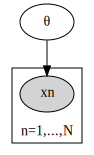

In [2]:
gcp = Digraph('coin_toss_bayes_plate')
gcp.node('theta', label='<&theta;>')
with gcp.subgraph(name='cluster_0') as sg:
    sg.node('xn', label='<x<sub>n</sub>>', style='filled')
    sg.attr(label='n=1,...,N')
    sg.attr(labelloc='b')
gcp.edge('theta', 'xn')
gcp.render('coin_toss_bayes_plate', format='png')
gcp

We are now ready to apply Bayes' rule to find the posterior.
Recall the Bayes' rule for propositions $A$ and $B$:
$$
p(A|B) = \frac{p(AB)}{p(B)}.
$$
We set here
$$
A = \text{the model parameters} = \theta,
$$
and
$$
B = \text{the data} = x_{1:N}.
$$
That is the question we ask is "what is the probability of the model parameters given the data?"
Let's just blindly follow the rule:
$$
p(\text{the model parameters}|\text{the data}) = \frac{p(\text{the data and the parameters})}{p(\text{the data})}.
$$
This $p(\text{the model parameters}|\text{the data})$ has a special name.
It is our *posterior state of knowledge* about the model parameters or simply the *posterior*.

We are ready to proceed.
What is the joint probability of the data and the parameters?
Well, we can use the Bayes rule again, but in this form:
$$
p(AB) = p(B|A)p(A).
$$
In our example:
$$
p(\text{the data and the parameters}) = p(\text{the data} | \text{the parameters}) p(\text{the parameters}).
$$
Putting it all together we get:
$$
\text{posterior} = p(\text{the model parameters}|\text{the data}) = 
\frac{p(\text{the data} | \text{the parameters}) p(\text{the parameters})}{p(\text{the data})}
$$
But we have given special names to the terms on the right:
$$
p(\text{the data} | \text{the parameters}) = p(x_{1:N}|\theta) = \text{likelihood},
$$
and
$$
p(\text{the parameters}) = p(\theta) = \text{prior}.
$$
So, we can now write the mnemonic (ignoring the normalization constant):
$$
\text{posterior} \propto \text{likelihood}\times\text{prior}.
$$
Tracking back our symbols, this can be written mathematically as:
$$
p(\theta | x_{1:N}) \propto p(x_{1:N}|\theta)p(\theta).
$$
*The posterior is everything a Bayesian has to say about the parameter estimation problem.*
Let's see it in practice.

## Example: Inferring the probability of a coin toss from data

A coin with unknown probability of heads $\theta$ is tossed $N$ times independently and you observe the result:
$$
x_{1:N} := (x_1,\dots,x_N).
$$
Assume that we have coded the result so that heads corresponds to a "0" and tails to a "1."
Our goal is to estimate the probability of heads $\theta$ from this dataset.

Assuming that we know nothing, we set:
$$
\theta \sim U([0,1]).
$$
In terms of probability densities this:
$$
p(\theta) = 
\begin{cases}
1,&\;\text{if}\;\theta\in [0,1],\\
0,&\;\text{otherwise}
\end{cases} =
1_{[0,1]}(\theta),
$$
where we used the indicator function to simplify the notation.

Now, let's write down the likelihood of the data.
Because of the independence assumption, we have:
$$
p(x_{1:N}|\theta) = \prod_{n=1}^Np(x_n|\theta).
$$
Then, each measurement is a Bernoulli with probability of success $\theta$, i.e.,
$$
x_n | \theta \sim \operatorname{Bernoulli}(\theta).
$$
In terms of probability densities, we have:
$$
p(x_n|\theta)
= \begin{cases}
\theta,&\;\text{if}\;x_n=0,\\
1-\theta,&\;\text{otherwise}.
\end{cases}
$$
Using a common mathematical trick, we can rewrite this as:
$$
p(x_n|\theta) = \theta^{x_n}(1-\theta)^{1-x_n}.
$$
Work out the cases $x_n=0$ and $x_n=1$ to convience yourself.

Now we can find the expression for the likelihood of the entire dataset.
It is
$$
\begin{split}
p(x_{1:N}|\theta) &=& \prod_{n=1}^Np(x_n|\theta)\\
&=& \prod_{n=1}^N\theta^{x_n}(1-\theta)^{1-x_n}\\
&=& \theta^{\sum_{n=1}^Nx_n}(1-\theta)^{N-\sum_{n=1}^N}.
\end{split}
$$
This has the intuitive meaning that it is the probability of getting $\sum_{n=1}^Nx_n$ heads and the rest $N-\sum_{n=1}^Nx_n$ tails.

We can now find the posterior.
It is:
$$
\text{posterior} \propto \text{likelihood}\times\text{prior}.
$$
In our problem:
$$
\begin{split}
p(\theta|x_{1:N}) &\propto& p(x_{1:N}|\theta)p(\theta)\\
&=& \theta^{\sum_{n=1}^Nx_n}(1-\theta)^{N-\sum_{n=1}^N} 1_{[0,1]}(\theta)\\
&=& \begin{cases}
\theta^{\sum_{n=1}^Nx_n}(1-\theta)^{N-\sum_{n=1}^N},&\;\text{if}\;\theta\in[0,1]\\
0,&\;\text{otherwise}.
\end{cases}
\end{split}
$$
And this is just the density corresponding to a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution):
$$
p(\theta|x_{1:N}) = \operatorname{Beta}\left(\theta\middle|1 + \sum_{n=1}^Nx_n, 1 + N - \sum_{n=1}^Nx_n\right).
$$
Let's try this out with some fake data.

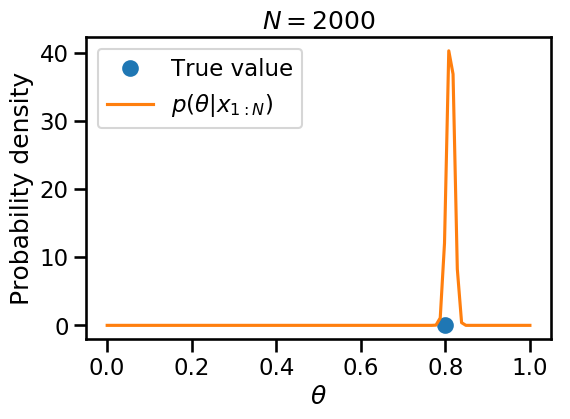

In [39]:
# Take a fake coin which is a little bit biased
theta_true = 0.8
# This is the random variable corresponding to a coin toss
X = st.bernoulli(theta_true)

# Sample from it a number of times to generate our data = (x1, ..., xN)
N = 2000
data = X.rvs(size=N)
# Now we are ready to calculate the posterior which the Beta we have above
alpha = 1.0 + data.sum()
beta = 1.0 + N - data.sum()
Theta_post = st.beta(alpha, beta)
# Now we can plot the posterior PDF for theta
fig, ax = plt.subplots(dpi = 100)
thetas = np.linspace(0, 1, 100)
ax.plot([theta_true], [0.0], 'o', markeredgewidth=2, markersize=10, label='True value')
ax.plot(thetas, Theta_post.pdf(thetas), label=r'$p(\theta|x_{1:N})$')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('Probability density')
ax.set_title('$N={0:d}$'.format(N))
plt.legend(loc='best')

## Questions

+ Try $N=0,5,10,100$ and see what happens.

## Credible Intervals

The posterior $p(\theta|x_{1:N})$ captures everything that we have to say about $\theta$.
Credible intervals are a way to summarize it.
A credible interval is basically an interval inside which the parameter $\theta$ lies with high probability.
Specifically, a 95\% credible interval $(\ell, u)$ (for lower and upper bounds) for $\theta$ is such that:
$$
p(\ell \le \theta \le u|x_{1:N}) = 0.95.
$$
Of course, there is not a unique credible interval.
You can move $(\ell, u)$ to the left or to the right in a way that keeps the probability contained in it at 0.95.

The *central credible interval* is particularly common.
It is defined by solving the following problems
$$
p(\theta \le \ell | x_{1:N}) = 0.025,
$$
and
$$
p(\theta \le u | x_{1:N}) = 0.975,
$$
for $\ell$ and $u$, respectively.
Here is how you can do it for the coin toss example above since you have the posterior analytically:

In [36]:
theta_low = Theta_post.ppf(0.025)
theta_up = Theta_post.ppf(0.975)
print('Theta is in [{0:1.2f}, {1:1.2f}] with 95% probability'.format(theta_low, theta_up))

Theta is in [0.77, 0.82] with 95% probability


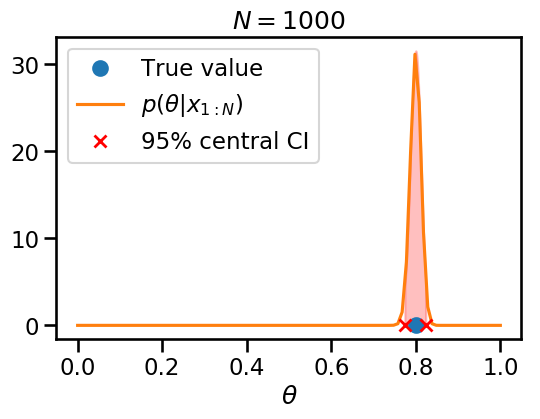

In [37]:
# Here is a visualization of this credible interval:
fig, ax = plt.subplots(dpi=100)
ax.plot([theta_true], [0.0], 'o', markeredgewidth=2, markersize=10, label='True value')
ax.plot(thetas, Theta_post.pdf(thetas), label=r'$p(\theta|x_{1:N})$')
thetas_int = np.linspace(theta_low, theta_up, 100)
ax.fill_between(thetas_int, np.zeros(thetas_int.shape), Theta_post.pdf(thetas_int), color='red', alpha=0.25)
ax.plot([theta_low, theta_up], np.zeros((2,)), 'x', color='red', markeredgewidth=2, label='95% central CI')
ax.set_xlabel(r'$\theta$')
ax.set_title('$N={0:d}$'.format(N))
plt.legend(loc='best')

So, is there another 95\% credible interval?
Yes there is. You can find it by solving thes problem:
$$
p(\theta \le \ell | x_{1:N}) = 0.01,
$$
and
$$
p(\theta \le u | x_{1:N}) = 0.96,
$$
for $\ell$ and $u$, respectively.
Here is what you will find for the coin toss example.

In [40]:
theta_low_o = Theta_post.ppf(0.005)
theta_up_o = Theta_post.ppf(0.995)
print('Theta is in [{0:1.2f}, {1:1.2f}] with 99% probability'.format(theta_low_o, theta_up_o))

Theta is in [0.79, 0.83] with 99% probability


And here is how it compares to the previous one:

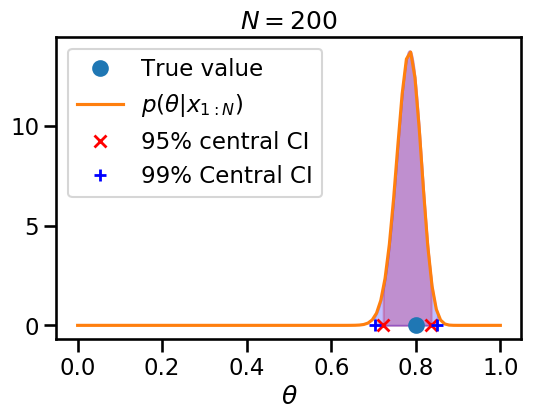

In [34]:
fig, ax = plt.subplots(dpi=100)
ax.plot([theta_true], [0.0], 'o', markeredgewidth=2, markersize=10, label='True value')
ax.plot(thetas, Theta_post.pdf(thetas), label=r'$p(\theta|x_{1:N})$')
thetas_int = np.linspace(theta_low, theta_up, 100)
ax.fill_between(thetas_int, np.zeros(thetas_int.shape), Theta_post.pdf(thetas_int), color='red', alpha=0.25)
ax.plot([theta_low, theta_up], np.zeros((2,)), 'x', color='red', markeredgewidth=2, label='95% central CI')
thetas_int_o = np.linspace(theta_low_o, theta_up_o, 100)
ax.fill_between(thetas_int_o, np.zeros(thetas_int_o.shape), Theta_post.pdf(thetas_int_o), color='blue', alpha=0.25)
ax.plot([theta_low_o, theta_up_o], np.zeros((2,)), '+', color='blue', markeredgewidth=2, label='99% Central CI')
ax.set_xlabel(r'$\theta$')
ax.set_title('$N={0:d}$'.format(N))
plt.legend(loc='best')

### Getting Credible Intervals when the Posterior is not Analytically Available
Of course many times you do not have the posterior in analytical form and you have to estimate the credible intervals via sampling.
We will learn about this in a later lecture.

### Questions
+ Find the credible interval for $\theta$ conditioned on the data with 99\% accuracy.
+ How many coin tosses do you have to do, in order to estimate $\theta$ within an accuracy of $1\%$ with $99\%$ probability? Do not try to do this analytically. Just experiment with different values of $N$ for this synthetic example. Getting a number $N$ that works for all possible datasets (assuming that the model is correct), is an interesting problem but it is not trivial.

## Bayesian Decision Making

So, we learned about credible intervals.
But what if someone asks you to report a single value for $\theta$ in the coin toss example?
What is the correct way of doing this?

This is actually a decision-making problem.
To answer it, you have to quantify the cost of making a mistake and then make a decision that minimizes this cost.
To formalize this concept, assume that we have a random variable $X$ and we have to guess a value for it.
Let $\ell(\theta', \theta)$ be the loss we incur when we guess $\theta'$ and the true value is $\theta$.
This is a completly subjective quantity.
However, here are some ideas:
+ The 0-1 loss:
$$
\ell_{01}(\theta',\theta) = \begin{cases}
1,&\;\text{if}\;\theta'=\theta\\
0,&\;\text{if}\;\theta'\not=\theta.
\end{cases}
= 1_{\{\theta'\}}(\theta).
$$
+ The square loss:
$$
\ell_2(\theta',\theta) = (\theta'-\theta)^2.
$$
+ The absolute loss:
$$
\ell_1(\theta',\theta) = |\theta'-\theta|.
$$

The rational thing to do, when choosing a value for $\theta$ is to minimize our *expected loss* where the expectation is taken over our posterior state of knowledge about $\theta$.
That is, we make our choice by solving this problem:
$$
\theta^* = \min_{\theta'} \mathbb{E}[\ell(\theta',\theta)|x_{1:N}] = \min_{\theta'} \int \ell(\theta',\theta)p(\theta|x_{1:N})d\theta.
$$
This, in general, is not a problem with an analytical solution.
However, for the two special loss functions above the answer is:
+ The choice that minimizes the 0-1 loss is the one maximizing the posterior:
$$
\theta^*_{01} = \arg\max_{\theta} p(\theta|x_{1:N}).
$$
+ The choice that minimizes the square loss is the expectation of the random variable:
$$
\theta^*_2 = \mathbb{E}[\theta|x_{1:N}] = \int \theta p(\theta|x_{1:N})d\theta.
$$
+ The choice that minimizes the absolute loss is the median:
$$
p(\theta \le \theta^*_1 | x_{1:N}) = 0.5.
$$

Let's find the first two for the first two lost function.
For the 0-1 loss, we just need to find the maximum of the posterior.
This is an optimization probem with an analytical solution, but we are not goint to find it...
We will just solve the problem using with a grid search:

In [8]:
idx = np.argmax(Theta_post.pdf(thetas))
theta_star_01 = thetas[idx]
print('theta_star_01 = {0:1.2f}'.format(theta_star_01))

theta_star_01 = 0.60


Now, let's the theta $\theta$ that minimizes the square loss.
We just have to find the expectation of the posterior $p(\theta|x_{1:N})$ (which is just a Beta).
It is:
$$
\theta^*_N = \mathbb{E}[\theta|x_{1:N}] = \frac{1+\sum_{n=1}^Nx_n}{1+\sum_{n=1}^Nx_n + N + 1 - \sum_{n=1}^Nx_n}
= \frac{1 + \sum_{n=1}^Nx_n}{N+2}.
$$

In [9]:
# In the example we had above:
theta_star_2 = Theta_post.expect()
print('theta_star_2 = {0:1.2f}'.format(theta_star_2))

theta_star_2 = 0.57


And finally, here is the median which minimizes the absolute loss:

In [10]:
# In the example we had above:
theta_star_1 = Theta_post.median()
print('theta_star_1 = {0:1.2f}'.format(theta_star_1))

theta_star_1 = 0.58


See them all together in the same plot:

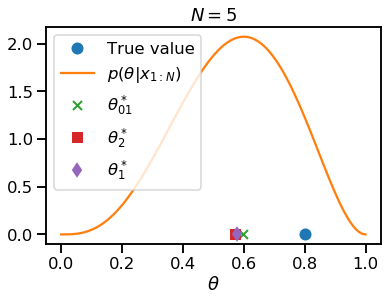

In [11]:
fig, ax = plt.subplots()
ax.plot([theta_true], [0.0], 'o', markeredgewidth=2, markersize=10, label='True value')
ax.plot(thetas, Theta_post.pdf(thetas), label=r'$p(\theta|x_{1:N})$')
ax.plot(theta_star_01, 0, 'x', markeredgewidth=2, label=r'$\theta^*_{01}$')
ax.plot(theta_star_2, 0, 's', markeredgewidth=2, label=r'$\theta^*_{2}$')
ax.plot(theta_star_1, 0, 'd', markeredgewidth=2, label=r'$\theta^*_{1}$')
ax.set_xlabel(r'$\theta$')
ax.set_title('$N={0:d}$'.format(N))
plt.legend(loc='best')

### Questions
+ Repeat the analysis for $N=0, 5, 10, 100$. Do these estimates converge to the true value?

## Example: The Normal distribution

The normal (or Gaussian) distribution is a ubiquitous one.
It appears over and over again.
There are two explanations as to why it appears so often:

+ It is the distribution of maximum uncertainty that matches a known mean and a known variance variance.
+ It is the distribution that arises when you add a lot of random variables together.

We will learn about both these in the next lectures.

We write:
$$
X | \mu, \sigma \sim N(\mu, \sigma),
$$
and we read "$X$ conditioned on $\mu$ and $\sigma$ follows a normal distribution with mean $\mu$ and variance $\sigma^2$.

When $\mu=0$ and $\sigma^2=1$, we say that we have a *standard normal* distribution.
Let
$$
Z\sim N(0,1).
$$
The PDF of the standard normal is:
$$
\phi(z) := N(z|0,1) = \frac{1}{\sqrt{2\pi}}\exp\left\{-\frac{z^2}{2}\right\}.
$$
The CDF of the standard normal is:
$$
\Phi(z) := \mathbb{P}(Z \le z) = \int_{-\infty}^z \phi(z')dz',
$$
is not analytically available.
However, there are codes that can compute it.

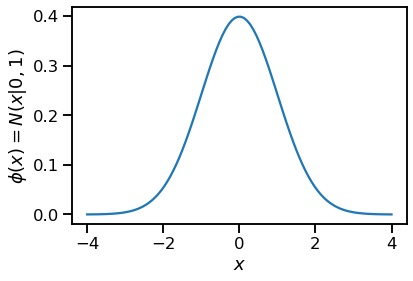

In [12]:
# Here is how you can get the PDF of the standard normal
Z = st.norm()
fig, ax = plt.subplots()
zs = np.linspace(-4.0, 4.0, 100)
ax.plot(zs, Z.pdf(zs))
ax.set_xlabel('$x$')
ax.set_ylabel('$\phi(x) = N(x|0,1)$');

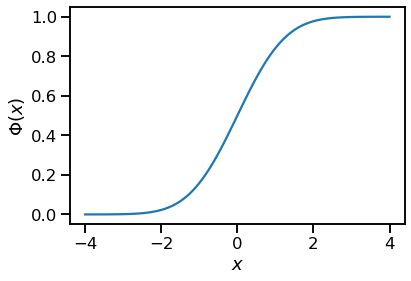

In [13]:
# And here is the CDF of the standard normal
fig, ax = plt.subplots()
ax.plot(zs, Z.cdf(zs))
ax.set_xlabel('$x$')
ax.set_ylabel('$\Phi(x)$');

In [14]:
# You can sample from the normal like this:
print(Z.rvs(size=100))

[ 0.64961109  1.31378841 -0.80393549  2.57981444  1.09447538 -0.5409932
 -0.6154049  -0.09449043  1.76019465 -0.90902962  0.46924218 -0.62686587
  0.55738637  0.57397071 -0.2133132  -0.85582055 -1.18077439  0.16661152
  0.99091074 -0.96271356 -0.08123007 -2.58507464 -0.04680993 -1.05078956
 -1.85132532 -0.49031172 -0.07111964  0.03717071  0.19324261  1.53051825
 -1.1660478   1.189306   -0.64649418 -0.84867771 -0.78540331 -0.58087941
  0.93922154 -1.28377277  0.82898385  0.98418454  0.11340074  0.51657629
 -1.22334581 -0.68399025  0.31640648 -0.10850718  0.95155272  0.35826951
 -1.54611766 -0.87619776 -0.10936123 -0.67759293 -0.63780655 -0.59737572
 -0.79827505  0.28210392  0.14197364 -0.13456345  0.47843485 -0.45243004
  1.34837537  0.77489533 -1.25667477 -0.39329854 -0.59720212  0.03782818
  0.80033183  0.45273178 -1.54272701 -0.56703558 -0.63634975 -1.78194391
 -0.36940129  1.4413729  -0.50521304 -1.66448747 -2.16740832  1.19971759
  0.9118655  -0.55282135  0.98430873 -1.20311167 -1.

Using the standard normal, we can express any normal.
It is easy to show that:
$$
X = \mu + \sigma Z,
$$
follows a $N(\mu,\sigma^2)$ if $Z$ follows and $N(0,1)$.
You must remember this!
It is extremely useful and it will appear again and again.
For example, using this relationship you can sample from any normal using samples from the standard normal.
Let's take some samples exploiting this relationship and then compare the histogram to the true PDF.

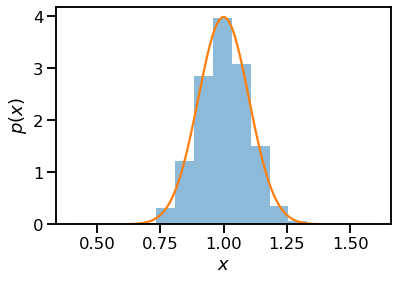

In [15]:
mu = 1.0
sigma = 0.1
X = st.norm(mu, sigma)
xs = np.linspace(mu - 6.0 * sigma, mu + 6.0 * sigma, 100)
x_samples = mu + sigma * Z.rvs(size=10000)
fig, ax = plt.subplots()
ax.hist(x_samples, density=True, alpha=0.5)
ax.plot(xs, X.pdf(xs))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$');

The reverse of the previous expression also holds.
For example, if $X | \mu, \sigma\sim N(\mu,\sigma)$, then the random variable
$$
Z = \frac{X-\mu}{\sigma},
$$
follows a standard normal.
You will be asked to prove this in the homework.

You should also remember the mathematical form of the PDF of $N(\mu,\sigma)$ which is:
$$
p(x) := \frac{1}{\sqrt{2\pi}\sigma}\exp\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\} = \frac{1}{\sigma}\phi\left(\frac{x-\mu}{\sigma}\right).
$$

There is also a very nice relationship between the CDF of $N(\mu,\sigma)$, call it $F(x)$, and the CDF of the standard normal $\Phi(z)$.
It is:
$$
F(x) = \mathbb{P}(X\le x|\mu,\sigma) = \mathbb{P}\left(\frac{X-\mu}{\sigma}\le \frac{x-\mu}{\sigma}\right) = \Phi\left(\frac{x-\mu}{\sigma}\right).
$$

## Example: Infering the mean of a normal with a known variance

Assume that we are performing an experiment $X_n$ that measures the acceleration of gravity and that we know that the measurement variance is $\sigma = 0.1$.
So, we have:
$$
X_n | g, \sigma \sim N(g, \sigma^2).
$$
So, the model says that the measured acceleration of gravity is around the true one with some Gaussian noise.

What is our state of knowlegde about $g$ before we see any data?
Assume that it is adequately captured by:
$$
g | g_0, s_0 \sim N(g_0, s_0^2),
$$
with known $g_0 = 10$, $s_0 = 0.4$.

The situtation is captured in the following graph:

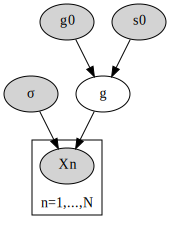

In [16]:
gn = Digraph('infer_normal_mu')
gn.node('g')
gn.node('g0', label='<g<sub>0</sub>>', style='filled')
gn.node('s0', label='<s<sub>0</sub>>', style='filled')
gn.edge('g0', 'g')
gn.edge('s0', 'g')
gn.node('sigma', label='<&sigma;>', style='filled')
with gn.subgraph(name='cluster_0') as sg:
    sg.node('Xn', label='<X<sub>n</sub>>', style='filled')
    sg.attr(label='n=1,...,N')
    sg.attr(labelloc='b')
gn.edge('g', 'Xn')
gn.edge('sigma', 'Xn')
gn.render('infer_normal_mu', format='png')
gn

We can directly condition on the variables that are at edges of the tree, $\sigma, g_0$ and $s_0$.
That is, you can just treat them as constants.
The joint probability density of the rest conditioned on these known parameters is (we read it from the graph):
$$
\begin{split}
p(x_{1:N}, g|\sigma, g_0, s_0) &=& p(x_{1:N}|g, \sigma) p(g|g_0, s_0)\\
&=& \left(\prod_{n=1}^Np(x_n|g, \sigma)\right) p(g|g_0, s_0)\\
&=& \left(\prod_{n=1}^NN(x_n|g,\sigma)\right)N(g|g_0,s_0)\\
&=& \left(\prod_{n=1}^N\frac{1}{\sqrt{2\pi}\sigma}\exp\left\{-\frac{(x_n-g)^2}{2\sigma^2}\right\}\right)\frac{1}{\sqrt{2\pi}s_0}\exp\left\{-\frac{(g-g_0)^2}{2s_0^2}\right\}\\
&\propto& \exp\left\{-\frac{\sum_{n=1}^N(x_n-g)^2}{2\sigma^2}-\frac{(g-g_0)^2}{2s_0^2}\right\},
\end{split}
$$
where we have ignored all proportionality constants for convenience.

From Bayes' rule, we have that our posterior state of knowledge:
$$
\begin{split}
p(g|x_{1:N}, \sigma, g_0, s_0) &=& \frac{p(x_{1:N}, g|\sigma, g_0, s_0)}{p(x_{1:N}|\sigma, g_0, s_0)}\\
&\propto& p(x_{1:N}, g|\sigma, g_0, s_0)\\
&\propto& \exp\left\{-\frac{\sum_{n=1}^N(x_n-g)^2}{2\sigma^2}-\frac{(g-g_0)^2}{2s_0^2}\right\}.
\end{split}
$$

That's pretty much the answer without the normalization constant.
But in this particular case, we can actually match this posterior to a normal distribution by following a technique known as "completing the square."
It is straightfoward, but it takes a little bit of algebra.
You take whatever is inside the exponentials and you try to form something like $(g-g')^2$ for some $g'$, whatever it turns out to be.
Let's try it out (you can lump into an additive "const" everything that doesn't depend on $g$):
$$
\begin{split}
\frac{\sum_{n=1}^N(x_n-g)^2}{2\sigma^2}+\frac{(g-g_0)^2}{2s_0^2} &=&
\frac{s_0^2 \sum_{n=1}^N(x_n-g)^2 + \sigma^2 (g-g_0)^2}{2\sigma^2s_0^2}\\
&=& \frac{s_0^2 N g^2 - 2s_0^2g\sum_{n=1}^Nx_n + s_0^2\sum_{n=1}^Nx_n + \sigma^2 g^2 - 2\sigma^2 gg_0 + \sigma^2g_0^2}{2\sigma^2s_0^2}\\
&=& \frac{g^2(s_0^2 N + \sigma^2) - 2 g (s_0^2\sum_{n=1}^Nx_n + \sigma^2 g_0)}{2\sigma^2s_0^2}+\text{const}\\
&=& \frac{g^2 - 2 g(s_0^2\sum_{n=1}^Nx_n + \sigma^2 g_0)(s_0^2 N + \sigma^2)^{-1}}{2\sigma^2s_0^2(s_0^2 N + \sigma^2)^{-1}} + \text{const}\\
&=& \frac{g^2 - 2 g \frac{1}{\frac{N}{\sigma^2} + \frac{1}{s_0^2}}\left(\frac{g_0}{s_0^2} + \frac{\sum_{n=1}^Nx_n}{\sigma^2}\right)}{2\left(\frac{1}{s_0^2} + \frac{N}{\sigma^2}\right)^{-1}} + \text{const}.
\end{split}
$$
Ok, it takes a bit more algebra than usual.
Now, we put this back into the exponential (with the minus sign in front of it), and we observe that it gives a normal for the posterior:
$$
p(g|x_{1:N}, \sigma, g_0, s_0) = N\left(g\middle| \frac{1}{\frac{N}{\sigma^2} + \frac{1}{s_0^2}}\left(\frac{g_0}{s_0^2} + \frac{\sum_{n=1}^Nx_n}{\sigma^2}\right),
\left(\frac{1}{s_0^2} + \frac{N}{\sigma^2}\right)^{-1}
\right).
$$
Not very pretty. But it is what it is. Let's experiment with this.

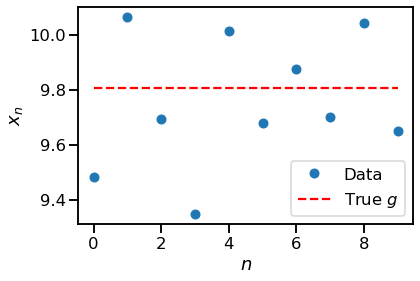

In [17]:
# Get the true acceleration of gravity from scipy
import scipy.constants
g_true = scipy.constants.g
# Generate some synthetic data
N = 10
sigma = 0.2
gs = g_true + sigma * np.random.randn(N)
fig, ax = plt.subplots()
ax.plot(gs, 'o', label='Data')
ax.plot(range(N), [g_true] * N, 'r--', label='True $g$')
ax.set_xlabel('$n$')
ax.set_ylabel('$x_n$')
plt.legend(loc='best')

In [18]:
# Our prior state of knowledge
g0 = 9.8
s0 = 0.2
G_prior = st.norm(g0, s0)
# We shoed that the posterior for g conditioned on data is a Gaussian with mean
gn = 1.0 / (N / sigma ** 2 + 1.0 / s0 ** 2) * (g0 / s0 ** 2 + gs.sum() / sigma ** 2)
# And standard deviation
sigman = np.sqrt(1.0 / (1.0 / s0 ** 2 + N / sigma ** 2))
print('The posterior of g is N({0:1.2f}, ({1:1.2f})^2)'.format(gn, sigman))

The posterior of g is N(9.76, (0.06)^2)


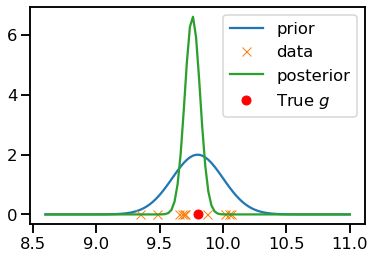

In [19]:
# Let's draw this
G_post = st.norm(gn, sigman)
fig, ax = plt.subplots()
ggs = np.linspace(g0 - 6.0 * s0, g0 + 6.0 * s0, 100)
ax.plot(ggs, G_prior.pdf(ggs), label='prior')
ax.plot(gs, np.zeros(gs.shape), 'x', label='data')
ax.plot(ggs, G_post.pdf(ggs), label='posterior')
ax.plot([g_true], [0.0], 'ro', label='True $g$')
plt.legend(loc='best');

In [20]:
# Let's get a credible interval:
g_025 = G_post.ppf(0.025)
g_975 = G_post.ppf(0.975)
print('g is in [{0:1.2f}, {1:1.2f}] with 95% probability'.format(g_025, g_975))

g is in [9.64, 9.88] with 95% probability


### Questions

+ Use Bayesian decision making to compute point estimates for $g$.
+ Experiment with the a very wrong prior knowledge, say $g_0 = 5$. Try at least a case where you are wrong but not very sure $s_0 = 1.0$ and a case where you are wrong and very sure $s_0 = 0.01$.
In both cases, increase $N$ until you get close enough to the true value of $g$.